In [6]:
import pandas as pd
from helpers import load_config
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np

config_path = os.path.join("configs", "configs.yaml")
config = load_config(config_path)
storage_dir = config["STORAGE_DIR_STUDY1"]

In [22]:
from PIL import Image
from IPython.display import display

def open_image(file_name):
    # Open the image
    img = Image.open(f'For_Kanan/images/{file_name}')  # Replace 'image_path.jpg' with the path to your image file
    # Display the image
    display(img)

In [10]:
pathological_data = pd.read_csv("Dataset/mydata/chol_tcga_pan_can_atlas_2018/pathological_df.csv")
pathological_data.head(3).T

,0,1,2
PATIENT_ID,TCGA-3X-AAV9,TCGA-3X-AAVA,TCGA-3X-AAVB
WEIGHT,52,92,76
PFS_STATUS,1:PROGRESSION,1:PROGRESSION,0:CENSORED
PFS_MONTHS,7.101292,8.679357,13.216294
SAMPLE_ID,TCGA-3X-AAV9-01,TCGA-3X-AAVA-01,TCGA-3X-AAVB-01
CANCER_TYPE,Cholangiocarcinoma,Cholangiocarcinoma,Cholangiocarcinoma
GRADE,2,2,1
ANEUPLOIDY_SCORE,10,5,24
MSI_SCORE_MANTIS,0.3138,0.3468,0.3343
MSI_SENSOR_SCORE,0.0,0.02,0.0


In [11]:
mutations_df = pd.read_csv(storage_dir+"mutations_summary.csv")
mutations_df.head(3)

,Tumor_Sample_Barcode,Mutation_Count,Mutations
0,TCGA-3X-AAV9-01,75,"TRUB1, ASCC1, RRM1, MAP3K11, LMO3, ABCC9, ANKR..."
1,TCGA-3X-AAVA-01,60,"ASAH2, ROBO4, ARFGAP2, TMEM132C, KRT3, DCLK1, ..."
2,TCGA-3X-AAVB-01,48,"WDFY4, A1CF, RAN, KRAS, STAT6, TUBGCP3, ISLR2,..."


Total patients: 32    
At the time of data collection:

- Cancer Non-Recur: 12 (37.5%)
- Cancer Recur: 20 (62.5%)

## Analysis 1

#### Keep only cases where cancer recurred and predict the time of recurrence (Regression)

Best Model : Support Vector Regressor - RMSE: 4.7249, R2: -9.8549% 


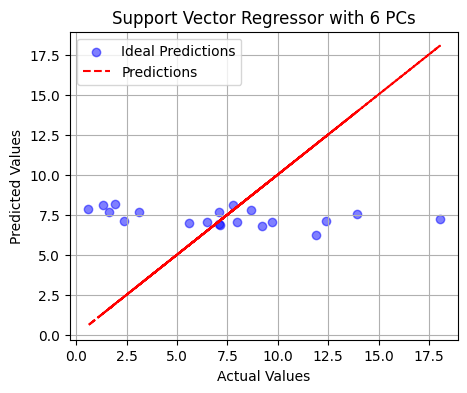

In [18]:
open_image("attempt1.png")

## Analysis 2 
#### Gene muatations analysis

- Get representation for gene mutations using GIT   
- some mutation representations were not present: PRR22, CENPU, etc.
- got average representation for the genes (size : 512)
- used PCA to shrink to 10 dims with VAE 75%





## Analysis 3

#### combine pathological and mutations data

- apply PCA separately on both pathological (60%+ VAE) and mutations(10 PCs)
- Second Best Model: Random Forest Regression - RMSE: 4.7504, R2: -11.0424%

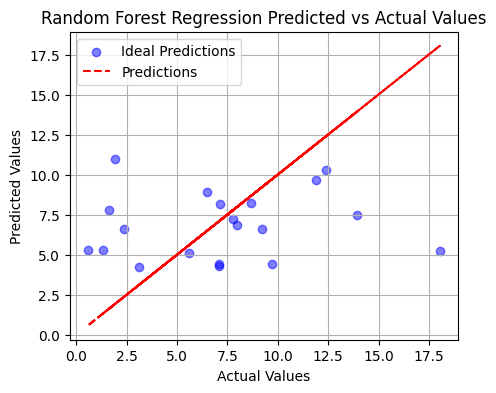

In [19]:
open_image("attempt3.png")

## Analysis 4
#### Convert regression to classification problem      
      
Goal: Predict if cancer recurred within a year or not.     

   
Observation:    
- Pathological data adds a lot of  value, especially PERSON_NEOPLASM_CANCER_STATUS, MSI_SENSOR_Score and AGE_AT_INITIAL_DIAGNOSIS. Random forest gives good results.    
- Experiment with PCs of both mutation and pathological data combined performed poorly. Need more data to assess its viability.     


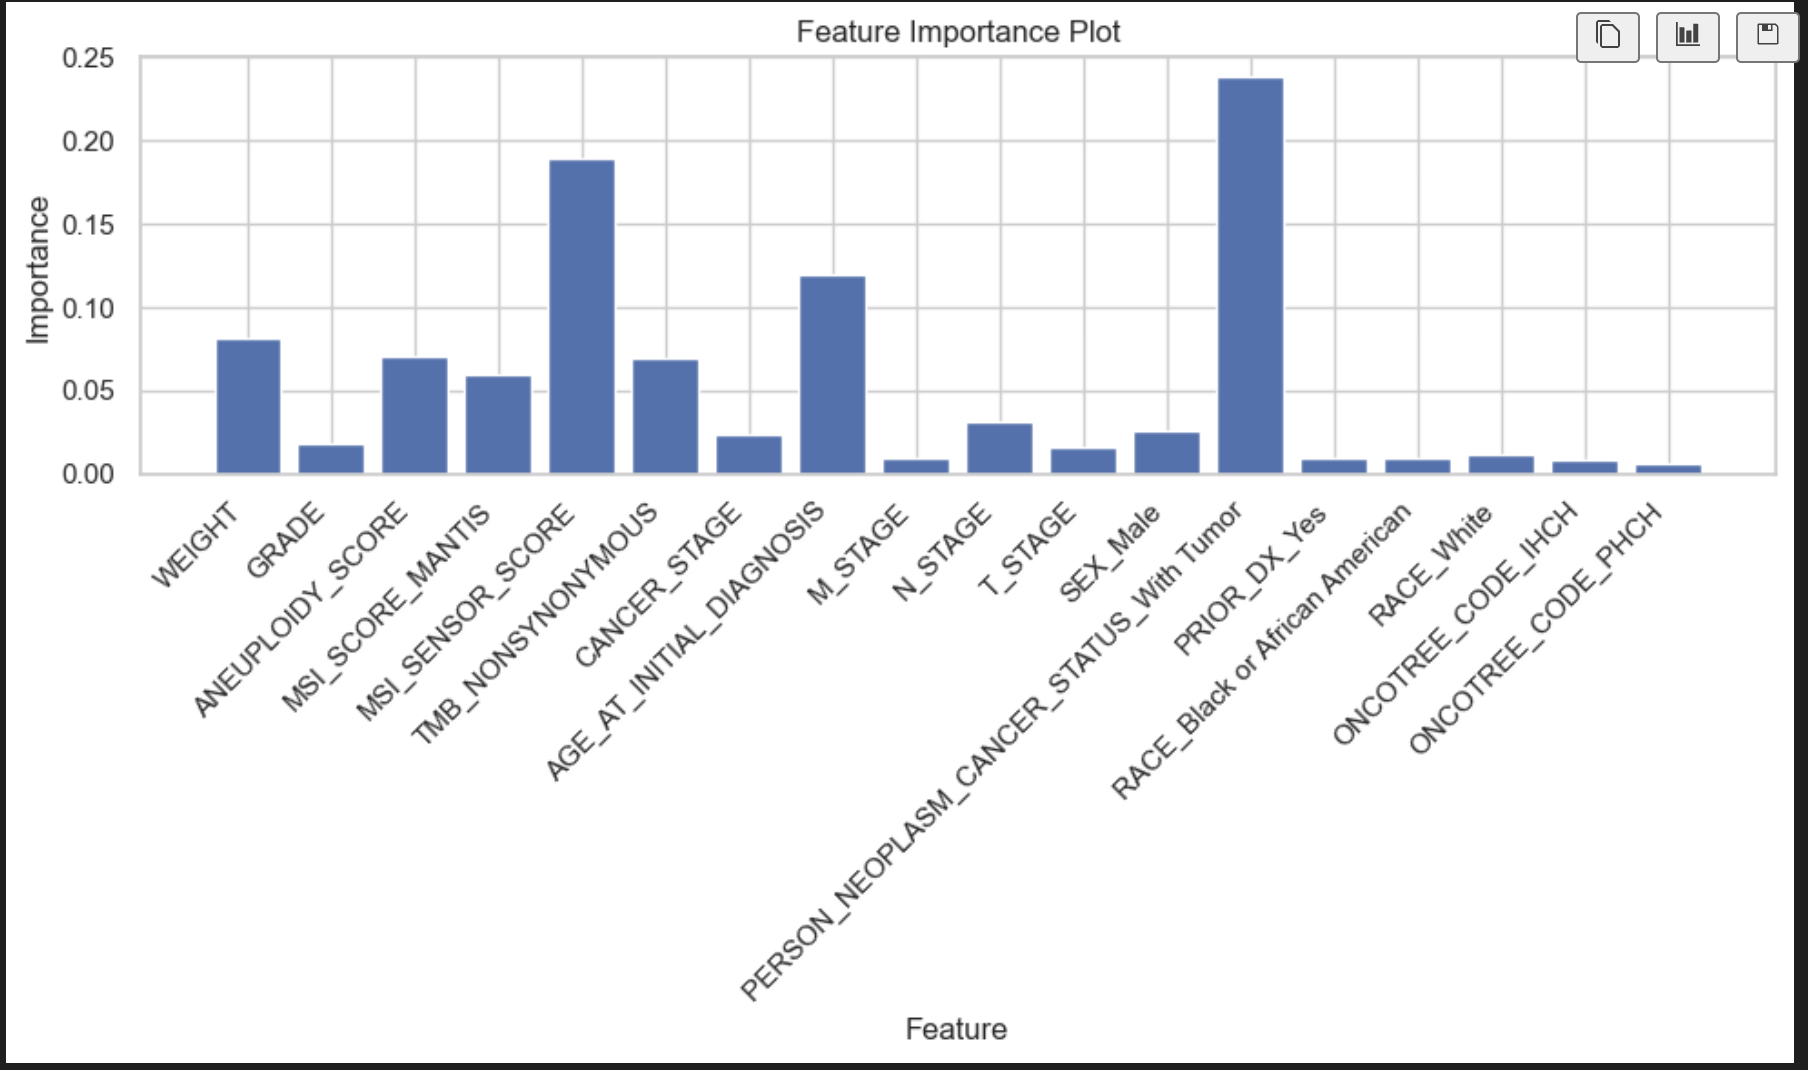

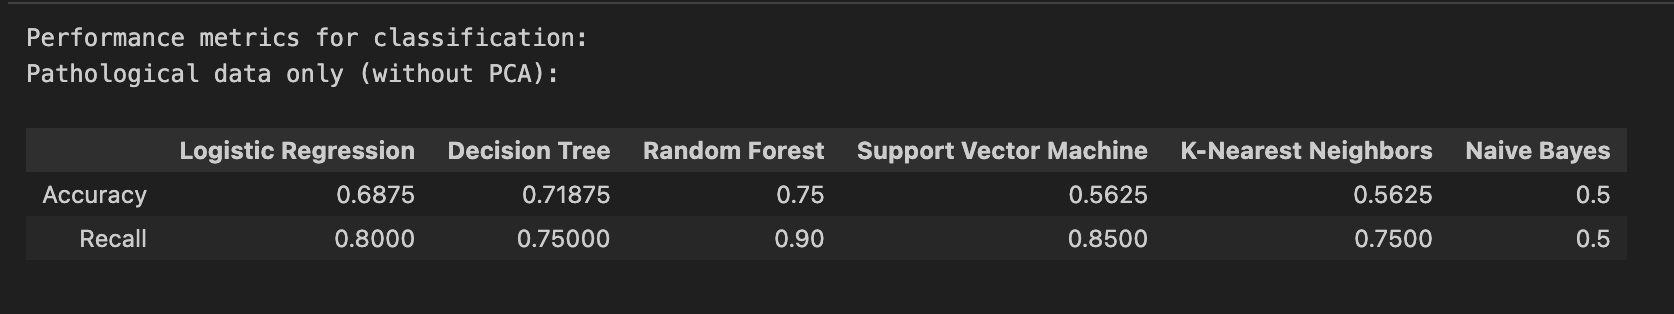

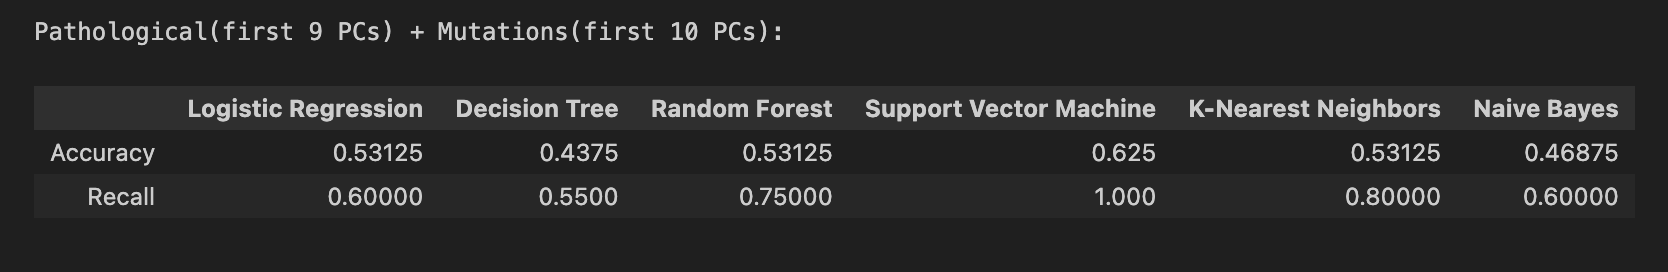

In [21]:
open_image("attenmpt4-feature-importance.png")
open_image("attempt4 path without pca.png")
open_image("attempt4 path mut w pca.png")

## <u>Food for thought: </u>

what factors could influence cancer coming back -
- type of treatment given, t
- their genomic data, 
- pathological data about patient(properties of tumor and body vitals), 
- physiological data

